In [17]:
# data
import pandas as pd
import numpy as np
from datetime import datetime
from math import ceil

# plots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
#Market Basket Analysis
- Substitute and complimentary products
- Analysis of lift, support, confidence, conviction
-

In [3]:
df = pd.read_csv('retail.csv')

In [33]:
df.groupby(['StockCode', 'Description'])['Quantity'].count()

StockCode     Description                        
10002         INFLATABLE POLITICAL GLOBE             71
10080         GROOVY CACTUS INFLATABLE               22
              check                                   1
10120         DOGGY RUBBER                           30
10123C        HEARTS WRAPPING TAPE                    3
                                                     ..
gift_0001_20  to push order througha s stock was      1
gift_0001_30  Dotcomgiftshop Gift Voucher £30.00      7
gift_0001_40  Dotcomgiftshop Gift Voucher £40.00      3
gift_0001_50  Dotcomgiftshop Gift Voucher £50.00      4
m             Manual                                  1
Name: Quantity, Length: 4792, dtype: int64

In [24]:
df['TotalValue'] = df['UnitPrice'] * df['Quantity']

<AxesSubplot:xlabel='Description'>

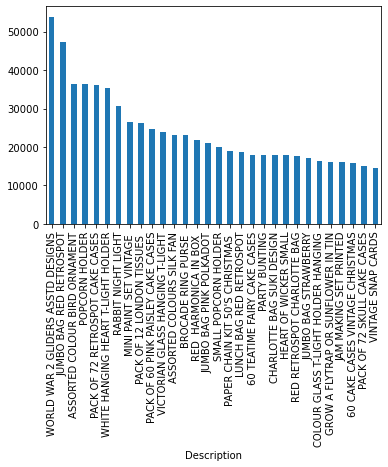

In [25]:
frequency = df.groupby('Description')['Quantity'].sum()
frequency = frequency.sort_values(ascending=False)
frequency[:30].plot(kind='bar')


In [48]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalValue          0
dtype: int64

In [49]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [29]:
profitable = df.groupby('Description')['TotalValue'].sum()
profitable = profitable.sort_values(ascending=False)
#profitable[:30].plot(kind='bar')


profitable

Description
DOTCOM POSTAGE                        206245.480
REGENCY CAKESTAND 3 TIER              164762.190
WHITE HANGING HEART T-LIGHT HOLDER     99668.470
PARTY BUNTING                          98302.980
JUMBO BAG RED RETROSPOT                92356.030
                                         ...    
Bank Charges                           -7175.639
CRUK Commission                        -7933.430
Adjust bad debt                       -11062.060
Manual                                -68671.640
AMAZON FEE                           -221520.500
Name: TotalValue, Length: 4223, dtype: float64